<a href="https://colab.research.google.com/github/JinnnnyHong/Study/blob/main/%EC%8B%A4%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#타겟 변수 전처리
df['income'].value_counts(normalize = True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [ ]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K','high', 'low')
df['income'].value_counts(normalize = True)

low     0.760718
high    0.239282
Name: income, dtype: float64

In [ ]:
#불필요한 변수 제거하기
df = df.drop(columns = 'fnlwgt')

In [ ]:
#문자타입 변수를 숫자 타입으로 바꾸기
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [ ]:
df_tmp['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [ ]:
#df_tmp 의 문자 타입 변수에 원핫 인코딩 적용 -> 숫자타입으로 바뀜
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [ ]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
target = df['income']
df = df.drop(columns = 'income') #income제거
df = pd.get_dummies(df)   #문자 타입 변수 원핫 인코딩

df['income'] = target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: int64(5), object(1), uint8(102)
memory usage: 7.0+ MB


In [ ]:
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  uint8 
 6    workclass_Federal-gov                      48842 non-null  uint8 
 7    workclass_Local-gov                        48842 non-null  uint8 
 8    workclass_Never-worked                     48842 non-null  uint8 
 9    workclass_Private                          48842 non-null  uint8 
 10   workclass_Self-emp-i

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,  #테스트 세트 비율
                                     stratify = df['income'], #타겟 변수 비율 유지
                                     random_state = 1234) #난수고정

In [ ]:
df_train.shape

(34189, 108)

In [ ]:
df_test.shape

(14653, 108)

In [ ]:
df_train['income'].value_counts(normalize = True)

low     0.760713
high    0.239287
Name: income, dtype: float64

In [ ]:
df_test['income'].value_counts(normalize = True)

low     0.760732
high    0.239268
Name: income, dtype: float64

In [ ]:
#의사결정나무 모델 만들기
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 3) #나무 깊이

In [ ]:
#모델 만들기
train_x = df_train.drop(columns = 'income') #예측 변수 추출
train_y = df_train['income'] #타겟 변수 추출

model = clf.fit(X = train_x, y = train_y)

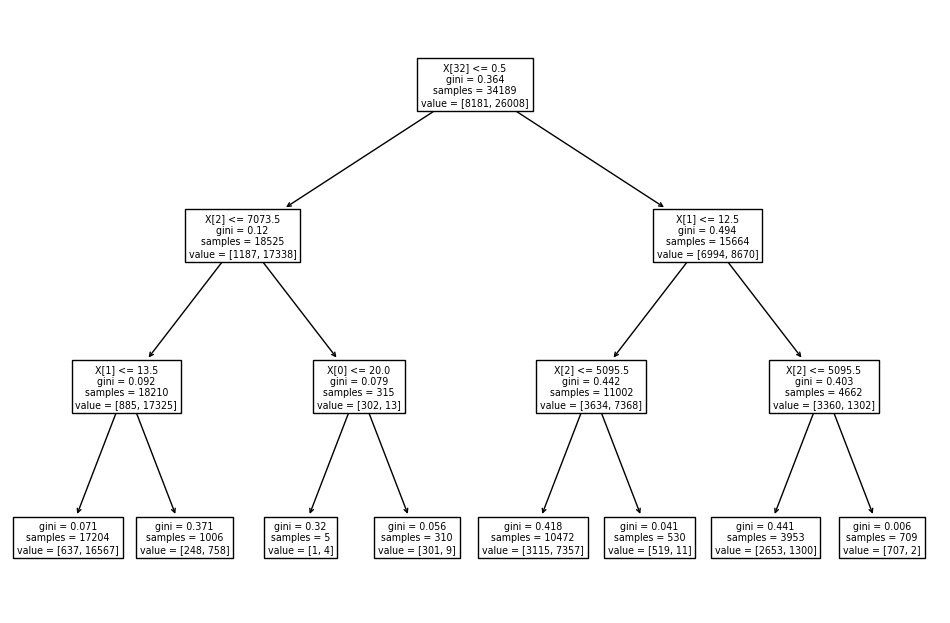

In [ ]:
#모델구조 살펴보기
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [12, 8],
                     'figure.dpi' : '100'})

tree.plot_tree(model);

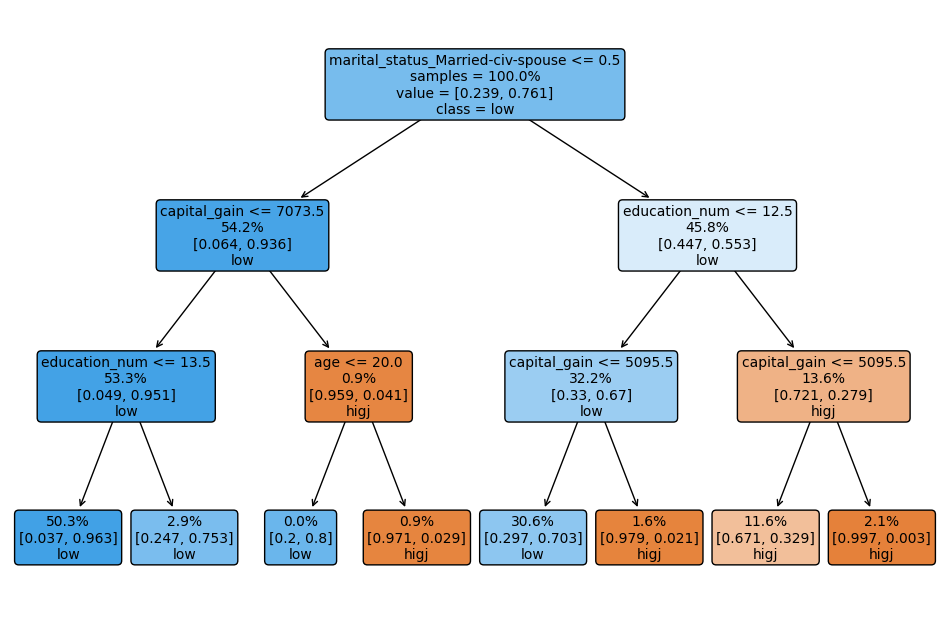

In [ ]:
tree.plot_tree(model,
               feature_names = train_x.columns, #예측 변수명
               class_names = ['higj', 'low'], #타겟 변수 클래스, 알파벳군
               proportion = True, #비율 표기
               filled = True, #색칠
               rounded = True, #둥근테두리
               impurity = False, #불순도 표기
               label = 'root', #label 표시 위치
               fontsize = 10); #글자 크기

In [ ]:
#모델 이용해 예측하기
test_x = df_test.drop(columns = 'income') #예측 변수 추출
test_y = df_test['income']

In [ ]:
#예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,low,low
24768,39,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low
26758,31,4,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
14295,23,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
3683,24,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
48445,35,13,10520,0,45,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,high
19639,41,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,low
21606,29,4,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low


In [ ]:
#성능 평가하기
# confusion matrix만들기

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'], #실제값
                            y_pred = df_test['pred'], #예측값
                            labels = ['high', 'low']) #클래스 배치 순서

conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

In [ ]:
plt.rcParams.update(plt.rcParamsDefault) # 그래픽 설정 되돌리기

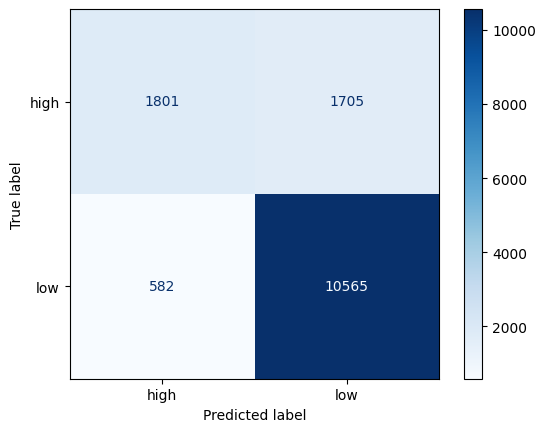

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat, #컨퓨전 매트릭스
                           display_labels = ('high', 'low')) #타겟 변수 클래스명

p.plot(cmap = 'Blues') #컬러맵 적용해 출력

In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'], #실제값
                       y_pred = df_test['pred']) #예측값

0.8439227461953184

In [ ]:
#정밀도: 관심 클래스를 예측해서 맞춘 비율
metrics.precision_score(y_true = df_test['income'],
                        y_pred = df_test['pred'],
                        pos_label = 'high')

0.7557700377675199

In [ ]:
#재현율: 실제 데이터에서 관심 클래스를 찾아낸 비율
metrics.recall_score(y_true = df_test['income'],
                     y_pred = df_test['pred'],
                     pos_label = 'high')

0.5136908157444381

In [ ]:
#f1 score : 정밀도와 재현율의 조화평균으로, 0~1사이의 값을 지니며 성능이 높을수록 1에 가까운 값이 된다.
metrics.f1_score(y_true = df_test['income'],
                 y_pred = df_test['pred'],
                 pos_label = 'high')

0.6116488368143997